In [128]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
# 크롬 드라이버 실행
driver = webdriver.Chrome("chromedriver.exe")
# 놀면뭐하니 유튜브 페이지로 이동
driver.get('https://www.youtube.com/c/%EB%86%80%EB%A9%B4%EB%AD%90%ED%95%98%EB%8B%88/videos')

In [129]:
import time
SCROLL_PAUSE_TIME = 0.5 #한번 스크롤하고 0.5초 멈춤
body = driver.find_element_by_tag_name("body") #화면의 본문인 body태그를 선택해 body에 대입

#스크롤이 끝까지 내려갈 때까지
while True:
    #현재 화면크기 출력
    last_height = driver.execute_script("return document.documentElement.scrollHeight")
    print('='*40)
    print("last_height: ", last_height)
    
    #0부터 9까지 10번 반복해서 실행
    for i in range(11):
        body.send_keys(Keys.END) #화면이 끝까지 스크롤되고 화면이 길어짐
        time.sleep(SCROLL_PAUSE_TIME)
        #스크롤 후 화면 길이를 리턴받아 new_height에 대입
    new_height = driver.execute_script("return document.documentElement.scrollHeight")
    print("new_height: ",new_height)
    print('='*40)
    
    if new_height == last_height:
        break

last_height:  2223
new_height:  19528
last_height:  19528
new_height:  25943
last_height:  25943
new_height:  25943


In [130]:
#유튜브 페이지 소스를 page에 대입
page = driver.page_source

In [131]:
#page에 저장된 태그를 BeautifulSoup을 이용해서 정리해서 리턴
from bs4 import BeautifulSoup
soup = BeautifulSoup(page, 'lxml')

In [132]:
#div태그 중 id 속성이 dismissible인 객체 조회(동영상 하나하나 조회)
all_videos = soup.find_all(id="dismissible")

In [133]:
#id를 이용해서 동영상 제목 조회
title_list=[]
for video in all_videos:
    title = video.find(id='video-title')
    if len(title.text.strip())>0:
        title_list.append(title.text)

In [134]:
print(title_list)

["[놀면 뭐하니? 선공개] 탑10 귀를 붙잡을 '취중진담' '아이 러브 유'야호~! MBC 210501 방송 (Hangout with Yoo - MSG Wannabe YooYaHo)", '[놀면 뭐하니? 예고] MSG워너비 후보자들, 드디어 가면 벗고 얼굴 공개?! MBC 210501방송 (Hangout with Yoo - MSG Wannabe YooYaHo)', '[놀면 뭐하니? 후공개] MSG 워너비 블라인드 오디션 풀영상 [하도권 - 눈물이 흐른다] (Hangout with Yoo - MSG Wannabe YooYaHo)', '[놀면 뭐하니? 후공개] MSG워너비 개인 애창곡 풀버전! 송중기 - 빗속에서 (Hangout with Yoo - MSG Wannabe YooYaHo)', '[놀면 뭐하니? 후공개] MSG 워너비 블라인드 오디션 풀영상 [카더가든 - I Believe] (Hangout with Yoo - MSG Wannabe YooYaHo)', '[놀면 뭐하니? 후공개] MSG 워너비 블라인드 오디션 풀영상 [카더가든 - 좋니 ] (Hangout with Yoo - MSG Wannabe YooYaHo)', '[놀면 뭐하니? 후공개] MSG워너비 개인 애창곡 풀버전! 류준열 - 사랑합니다 (Hangout with Yoo - MSG Wannabe YooYaHo)', '[놀면 뭐하니? 후공개] MSG워너비 개인 애창곡 풀버전! 김남길 - 다시 사랑한다 말할까 (Hangout with Yoo - MSG Wannabe YooYaHo)', '[놀면 뭐하니? 후공개] MSG워너비 그룹 미션 풀영상! 수락산조 - 미워도 다시 한 번  (Hangout with Yoo - MSG Wannabe YooYaHo)', '[놀면 뭐하니? 후공개] MSG워너비 개인 애창곡 풀버전! 하도권(조니뎁) - 널 사랑하니까 (실내카메라) (Hangout with Yoo - MSG Wannabe YooYaHo)', '[놀면 뭐하니? 후공개] MSG워너비 개인 애창곡 풀버전! 카더가든

In [135]:
#유튜브 재생시간 조회
video_time_list=[]
for video in all_videos:
    video_time=video.find('span',{"class":'style-scope ytd-thumbnail-overlay-time-status-renderer'})
    video_time_list.append(video_time.text.strip())
    
print(video_time_list)

['3:31', '0:55', '3:27', '2:13', '4:40', '4:54', '1:37', '2:17', '4:18', '2:15', '2:30', '4:09', '3:00', '24:37', '0:54', '6:14', '2:15:31', '3:58', '4:40', '4:39', '4:34', '4:03', '4:02', '4:01', '4:32', '4:44', '4:13', '5:20', '3:34', '3:48', '2:07', '3:48', '4:46', '3:45', '3:38', '3:22', '4:10', '4:33', '3:48', '3:29', '4:05', '4:54', '4:42', '2:55', '2:43', '0:53', '1:39', '4:07', '3:41', '4:02', '4:02', '2:22', '3:30', '2:59', '0:52', '5:26', '4:03', '5:26', '5:33', '4:07', '5:34', '3:13', '3:49', '2:08', '4:44', '3:38', '2:59', '0:31', '3:22', '0:52', '2:51', '3:43', '1:42', '0:44', '1:22', '2:34', '2:44', '1:28', '3:41', '2:53', '0:50', '2:55', '1:00', '3:00', '3:04', '3:59', '1:14', '3:06', '0:59', '3:30', '3:11', '4:01', '0:41', '3:17', '3:07', '0:54', '3:38', '2:53', '0:49', '3:06', '3:19', '3:01', '8:02', '0:47', '3:30', '3:05', '4:10', '3:19', '7:30', '0:29', '2:58', '3:06', '2:37', '0:50', '1:06', '1:11', '4:39', '3:37', '0:34', '3:14', '5:11', '4:55', '3:27', '3:56', '0:

In [136]:
video_time_separate_list=[]
for time in video_time_list:
    time_list=time.split(":")
    if len(time_list)<3:  #분 초를 계산해서 리스트에 추가
        video_time_separate_list.append(int(time_list[0])*60+int(time_list[1]))
    else:
        video_time_separate_list.append(int(time_list[0])*3600+int(time_list[1])*60+int(time_list[2]))
video_time_separate_list

[211,
 55,
 207,
 133,
 280,
 294,
 97,
 137,
 258,
 135,
 150,
 249,
 180,
 1477,
 54,
 374,
 8131,
 238,
 280,
 279,
 274,
 243,
 242,
 241,
 272,
 284,
 253,
 320,
 214,
 228,
 127,
 228,
 286,
 225,
 218,
 202,
 250,
 273,
 228,
 209,
 245,
 294,
 282,
 175,
 163,
 53,
 99,
 247,
 221,
 242,
 242,
 142,
 210,
 179,
 52,
 326,
 243,
 326,
 333,
 247,
 334,
 193,
 229,
 128,
 284,
 218,
 179,
 31,
 202,
 52,
 171,
 223,
 102,
 44,
 82,
 154,
 164,
 88,
 221,
 173,
 50,
 175,
 60,
 180,
 184,
 239,
 74,
 186,
 59,
 210,
 191,
 241,
 41,
 197,
 187,
 54,
 218,
 173,
 49,
 186,
 199,
 181,
 482,
 47,
 210,
 185,
 250,
 199,
 450,
 29,
 178,
 186,
 157,
 50,
 66,
 71,
 279,
 217,
 34,
 194,
 311,
 295,
 207,
 236,
 54,
 180,
 383,
 22,
 40,
 102,
 327,
 186,
 202,
 54,
 238,
 213,
 172,
 54,
 208,
 196,
 56,
 176,
 134,
 268,
 57,
 260,
 184,
 141,
 307,
 49,
 180,
 189,
 48,
 175,
 182,
 75,
 178,
 182,
 283,
 61,
 161,
 49,
 62,
 187,
 502,
 63,
 50,
 356,
 63,
 63,
 252,
 63,
 253,
 2

In [137]:
#조회수 크롤링
view_num_list=[]
import re
#조회수를 포함하는 문자열을 검색하기 위한 객체 view_num_regexp생성
view_num_regexp = re.compile(r'조회수')

for video in all_videos:
    #비디오에 포함된 조회수를 리턴
    #span 태그 이면서 class속성이 style-scope ytd-grid-video-renderer 인 객체 조회
    view_num = video.find('span',{"class":'style-scope ytd-grid-video-renderer'})
    #view_num의 문자열(view_num.text) 에 '조회수' 문자열이 포함되 있으면 true
    #if view_num_regexp.search(view_num.text):
    if view_num_regexp.search(view_num.text): #view_num.text중 '조회수'를 포함하는 문자열 검색
        #view_num_list에 view_num.text(조회수 문자열)을 추가 :view_num_list.append(view_num.text)
        view_num_list.append(view_num.text)

view_num_list

['조회수 5.2천회',
 '조회수 48만회',
 '조회수 12만회',
 '조회수 7.2만회',
 '조회수 4.5만회',
 '조회수 7.7만회',
 '조회수 9.6만회',
 '조회수 22만회',
 '조회수 51만회',
 '조회수 18만회',
 '조회수 23만회',
 '조회수 90만회',
 '조회수 27만회',
 '조회수 301만회',
 '조회수 21만회',
 '조회수 55만회',
 '조회수 81만회',
 '조회수 592만회',
 '조회수 315만회',
 '조회수 551만회',
 '조회수 498만회',
 '조회수 874만회',
 '조회수 19만회',
 '조회수 145만회',
 '조회수 59만회',
 '조회수 210만회',
 '조회수 58만회',
 '조회수 28만회',
 '조회수 64만회',
 '조회수 18만회',
 '조회수 17만회',
 '조회수 26만회',
 '조회수 19만회',
 '조회수 56만회',
 '조회수 45만회',
 '조회수 15만회',
 '조회수 12만회',
 '조회수 16만회',
 '조회수 8.7만회',
 '조회수 19만회',
 '조회수 18만회',
 '조회수 7.8만회',
 '조회수 10만회',
 '조회수 60만회',
 '조회수 107만회',
 '조회수 73만회',
 '조회수 24만회',
 '조회수 75만회',
 '조회수 40만회',
 '조회수 18만회',
 '조회수 59만회',
 '조회수 73만회',
 '조회수 39만회',
 '조회수 25만회',
 '조회수 20만회',
 '조회수 127만회',
 '조회수 144만회',
 '조회수 80만회',
 '조회수 109만회',
 '조회수 110만회',
 '조회수 54만회',
 '조회수 89만회',
 '조회수 60만회',
 '조회수 15만회',
 '조회수 20만회',
 '조회수 9.2만회',
 '조회수 44만회',
 '조회수 8.1만회',
 '조회수 6.6만회',
 '조회수 3.6만회',
 '조회수 12만회',
 '조회수 12만회',
 '조회수 24만회',
 '조회수 7.9만회',
 '조회수 5.6만회',

In [138]:
#조회수를 숫자로 변환해서 저장
view_number_type_list=[]
for view in view_num_list:
    view=view.replace("조회수 ","")
    num=float(view[:-2])
    danwee=view[-2:]
    if danwee =='만회':
        view_number_type_list.append(int(num*10000))
    else:
        view_number_type_list.append(int(num*1000))
view_number_type_list

[5200,
 480000,
 120000,
 72000,
 45000,
 77000,
 96000,
 220000,
 510000,
 180000,
 230000,
 900000,
 270000,
 3010000,
 210000,
 550000,
 810000,
 5920000,
 3150000,
 5510000,
 4980000,
 8740000,
 190000,
 1450000,
 590000,
 2100000,
 580000,
 280000,
 640000,
 180000,
 170000,
 260000,
 190000,
 560000,
 450000,
 150000,
 120000,
 160000,
 87000,
 190000,
 180000,
 78000,
 100000,
 600000,
 1070000,
 730000,
 240000,
 750000,
 400000,
 180000,
 590000,
 730000,
 390000,
 250000,
 200000,
 1270000,
 1440000,
 800000,
 1090000,
 1100000,
 540000,
 890000,
 600000,
 150000,
 200000,
 92000,
 440000,
 81000,
 66000,
 36000,
 120000,
 120000,
 240000,
 79000,
 56000,
 58000,
 170000,
 390000,
 260000,
 440000,
 310000,
 250000,
 96000,
 110000,
 140000,
 150000,
 130000,
 240000,
 130000,
 510000,
 250000,
 220000,
 100000,
 110000,
 110000,
 93000,
 200000,
 380000,
 240000,
 140000,
 140000,
 80000,
 28000,
 180000,
 400000,
 160000,
 130000,
 120000,
 240000,
 69000,
 410000,
 130000,

In [139]:
dict_youtube={"title":title_list, "video_time":video_time_separate_list,"view_num":view_number_type_list}

In [140]:
import pandas as pd
youtube=pd.DataFrame(dict_youtube)
youtube.head(100)

,title,video_time,view_num
0,[놀면 뭐하니? 선공개] 탑10 귀를 붙잡을 '취중진담' '아이 러브 유'야호~! ...,211,5200
1,"[놀면 뭐하니? 예고] MSG워너비 후보자들, 드디어 가면 벗고 얼굴 공개?! MB...",55,480000
2,[놀면 뭐하니? 후공개] MSG 워너비 블라인드 오디션 풀영상 [하도권 - 눈물이 ...,207,120000
3,[놀면 뭐하니? 후공개] MSG워너비 개인 애창곡 풀버전! 송중기 - 빗속에서 (H...,133,72000
4,[놀면 뭐하니? 후공개] MSG 워너비 블라인드 오디션 풀영상 [카더가든 - I B...,280,45000
...,...,...,...
95,[놀면 뭐하니? 예고] 레전드들과 함께한 겨울노래 구출 작전! MBC210102방송,54,93000
96,[놀면 뭐하니? 선공개] 겨울노래 구출 작전! '가로수 그늘아래' 에서 함께 해'보...,218,200000
97,[놀면 뭐하니? 선공개] 🎄크리스마스 특집🎄 겨울노래 구출 작전 찍먹해보실래요? M...,173,380000
98,[놀면 뭐하니? 예고] 겨울 노래 구출 작전 다음 타깃은 과연 누구?! MBC201...,49,240000


## 제목과 조회수의 연관성 분석
- 텍스트 분석, 텍스트 마이닝 : 자연어 처리에 기반하고 있음.
- 텍스트 정규화(토큰화:의미단위로분학, 어간추출, 형태소분석:토큰형태소파악)

In [141]:
from konlpy.tag import Twitter
twitter = Twitter()

C:\Users\stone\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [142]:
#단어들 토큰으로
tagged = twitter.pos(youtube['title'][0], stem=True) #stem=True:기본형으로
tagged

[('[', 'Punctuation'),
 ('놀다', 'Verb'),
 ('뭐', 'Noun'),
 ('하다', 'Verb'),
 ('?', 'Punctuation'),
 ('선공', 'Noun'),
 ('개', 'Suffix'),
 (']', 'Punctuation'),
 ('탑', 'Noun'),
 ('10', 'Number'),
 ('귀', 'Noun'),
 ('를', 'Josa'),
 ('붙잡다', 'Verb'),
 ("'", 'Punctuation'),
 ('취중진담', 'Noun'),
 ("'", 'Punctuation'),
 ("'", 'Punctuation'),
 ('아이', 'Noun'),
 ('러브', 'Noun'),
 ('유', 'Noun'),
 ("'", 'Punctuation'),
 ('야호', 'Noun'),
 ('~!', 'Punctuation'),
 ('MBC', 'Alpha'),
 ('210501', 'Number'),
 ('방송', 'Noun'),
 ('(', 'Punctuation'),
 ('Hangout', 'Alpha'),
 ('with', 'Alpha'),
 ('Yoo', 'Alpha'),
 ('-', 'Punctuation'),
 ('MSG', 'Alpha'),
 ('Wannabe', 'Alpha'),
 ('YooYaHo', 'Alpha'),
 (')', 'Punctuation')]

In [143]:
for i in range(0,len(tagged)):
    if (tagged[i][1]=='Noun'):
        print(tagged[i][0]) #tagged(단어, 품사)로 정의되어있는데 단어만출력

뭐
선공
탑
귀
취중진담
아이
러브
유
야호
방송


In [144]:
#그래프그리기
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

C:\Users\stone\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\stone\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\stone\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


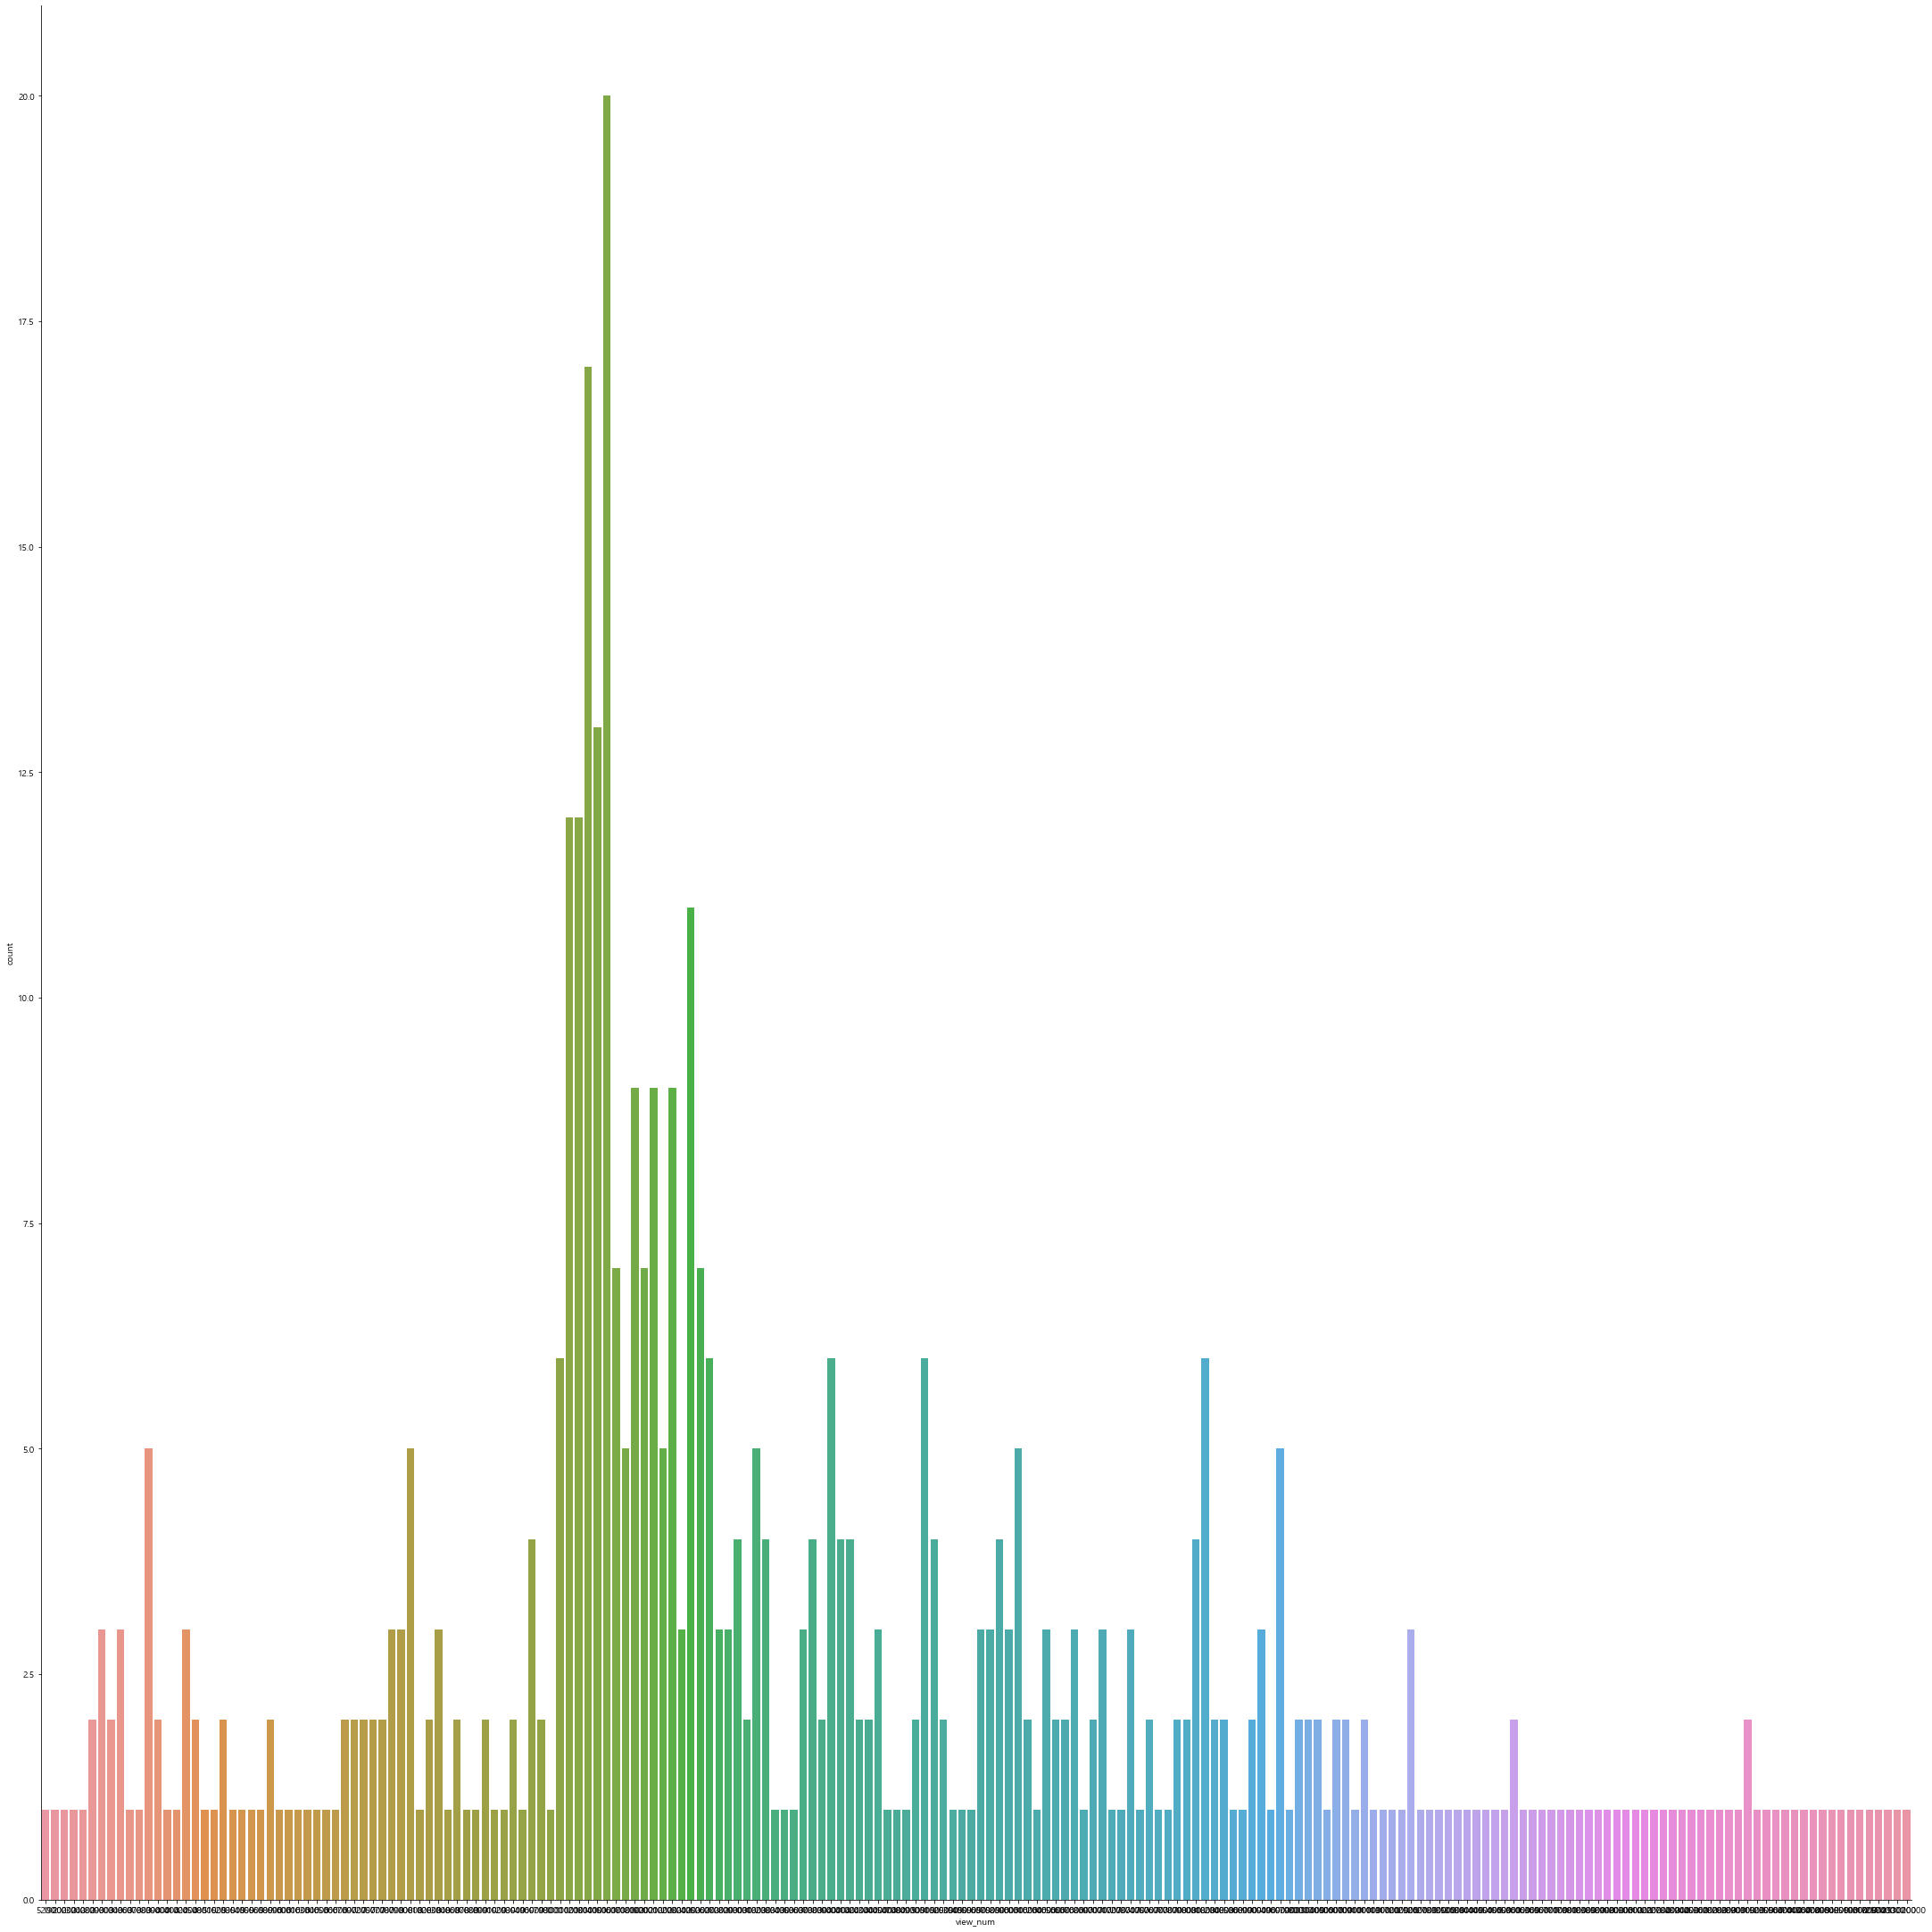

In [146]:
g=sns.factorplot('view_num',data=youtube,kind='count',size=30)

In [147]:
#조회수가 null인 줄 삭제
youtube = youtube.dropna(subset=['view_num'])
#view_num2컬럼 생성
youtube['view_num2']=0
youtube.head()

,title,video_time,view_num,view_num2
0,[놀면 뭐하니? 선공개] 탑10 귀를 붙잡을 '취중진담' '아이 러브 유'야호~! ...,211,5200,0
1,"[놀면 뭐하니? 예고] MSG워너비 후보자들, 드디어 가면 벗고 얼굴 공개?! MB...",55,480000,0
2,[놀면 뭐하니? 후공개] MSG 워너비 블라인드 오디션 풀영상 [하도권 - 눈물이 ...,207,120000,0
3,[놀면 뭐하니? 후공개] MSG워너비 개인 애창곡 풀버전! 송중기 - 빗속에서 (H...,133,72000,0
4,[놀면 뭐하니? 후공개] MSG 워너비 블라인드 오디션 풀영상 [카더가든 - I B...,280,45000,0


In [148]:
#유튜브 조회수 3단계로 분류
for index in range(len(youtube)):
    view_num = youtube["view_num"][index]
    if (view_num<100000):
        youtube['view_num2'][index]=0
    elif view_num<5000000:
        youtube['view_num2'][index]=1
    else :
        youtube['view_num2'][index]=2
youtube.head(50)

<ipython-input-148-c3bf87f63493>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube['view_num2'][index]=0
<ipython-input-148-c3bf87f63493>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube['view_num2'][index]=1
<ipython-input-148-c3bf87f63493>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube['view_num2'][index]=2


,title,video_time,view_num,view_num2
0,[놀면 뭐하니? 선공개] 탑10 귀를 붙잡을 '취중진담' '아이 러브 유'야호~! ...,211,5200,0
1,"[놀면 뭐하니? 예고] MSG워너비 후보자들, 드디어 가면 벗고 얼굴 공개?! MB...",55,480000,1
2,[놀면 뭐하니? 후공개] MSG 워너비 블라인드 오디션 풀영상 [하도권 - 눈물이 ...,207,120000,1
3,[놀면 뭐하니? 후공개] MSG워너비 개인 애창곡 풀버전! 송중기 - 빗속에서 (H...,133,72000,0
4,[놀면 뭐하니? 후공개] MSG 워너비 블라인드 오디션 풀영상 [카더가든 - I B...,280,45000,0
5,[놀면 뭐하니? 후공개] MSG 워너비 블라인드 오디션 풀영상 [카더가든 - 좋니 ...,294,77000,0
6,[놀면 뭐하니? 후공개] MSG워너비 개인 애창곡 풀버전! 류준열 - 사랑합니다 (...,97,96000,0
7,[놀면 뭐하니? 후공개] MSG워너비 개인 애창곡 풀버전! 김남길 - 다시 사랑한다...,137,220000,1
8,[놀면 뭐하니? 후공개] MSG워너비 그룹 미션 풀영상! 수락산조 - 미워도 다시 ...,258,510000,1
9,[놀면 뭐하니? 후공개] MSG워너비 개인 애창곡 풀버전! 하도권(조니뎁) - 널 ...,135,180000,1


C:\Users\stone\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\stone\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\stone\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


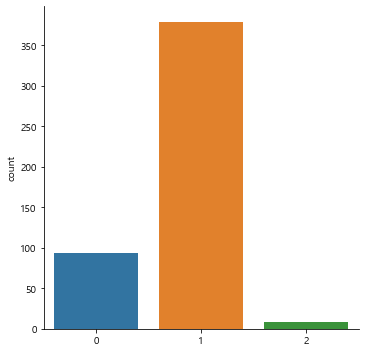

In [149]:
g = sns.factorplot('view_num2', data=youtube, kind='count', size = 5)
g.set(xlabel='')

In [150]:
import numpy as np
from sklearn.model_selection import train_test_split

In [151]:
# x_train에 제목 넣어주고 y_train에 조회수등급 넣어줌
x_train, x_test, y_train, y_test = train_test_split(youtube["title"], youtube["view_num2"])

In [152]:
x_train

434                     [유튜브 온리] 트로트 가수 유산슬, 알고보니 중고신인?!
175         [싹쓰리(SSAK3) 솔로곡] 유두래곤 - 두리쥬와(Feat. S.B.N) MV
168    [4K] 싹쓰리(SSAK3) - 린다G(LINDA G) 직캠  '그 여름을 틀어줘'...
151    [환불원정대 선공개 - 선불원정대] 환불원정대의 즉흥 댄스무대💃 (Hangout w...
111    (Eng sub) [놀면 뭐하니? 선공개] 가을 품는 멋쟁이 세 남자👨‍👨‍👦 갑자...
                             ...                        
283    [유튜브 온리] 이자람 - 심청가(뮤지컬 '서편제' 中)🎶 | 방구석 콘서트 직캠 ...
11     [놀면 뭐하니? 후공개] MSG워너비 그룹 미션 풀영상 우장산조 - 아무리 생각해도...
421    [유튜브 온리] 맫씨 내리고 마미손 올려🏳 랩, 댄스를 넘어 감성까지 넘보는 랩씬의...
274                       [후공개] 닭터유, 제작진을 위해 직접 치킨을...?!
299     [놀면뭐하니? 선공개] 이승환 - 슈퍼히어로 | 방구석 콘서트 2층 4열 센터석 직캠📸
Name: title, Length: 360, dtype: object

In [153]:
y_train

434    1
175    1
168    1
151    1
111    1
      ..
283    0
11     1
421    1
274    1
299    1
Name: view_num2, Length: 360, dtype: int64

In [154]:
#명사와 형용사만 리턴하는 함수
def getNounAndAdject(text):
    stems = []
    tagged = twitter.pos(text, stem = True)
    for i in range(0, len(tagged)) :
        if (tagged[i][1] == 'Noun' or tagged[i][1] == 'Adjective'):
            stems.append(tagged[i][0])
    return stems

In [155]:
#위의함수 테스트
getNounAndAdject("아버지가 방에 들어가신다 그래서 슬프다")

['아버지', '방', '슬프다']

In [156]:
#문자열의 tfidf계산(중요 단어 계산)하는 객체
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=2, tokenizer=getNounAndAdject)

In [157]:
#학습데이터의 tfidf를 계산
x_train_vector = vectorizer.fit_transform(x_train)
#테스트데이터의 tfidf계산
x_test_vector = vectorizer.transform(x_test)

In [158]:
#x_train_vector를 데이터 프레임으로 변환
df_tfidf1 = pd.DataFrame(x_train_vector.A, columns=vectorizer.get_feature_names())
df_tfidf1

,가게,가수,가요,감성,갑자기,개,개그,개인,거,것,...,화려하다,환불,활동,황제성,회,효리,후,후불,휴가,흥
0,0.0,0.431173,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.401925,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.00000,0.455336,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
356,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.185340,0.0,0.0,0.0
357,0.0,0.000000,0.0,0.51763,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
358,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.213997,0.0,0.0,0.0


In [159]:
df_tfidf2 = pd.DataFrame(x_test_vector.A, columns=vectorizer.get_feature_names())
df_tfidf2

,가게,가수,가요,감성,갑자기,개,개그,개인,거,것,...,화려하다,환불,활동,황제성,회,효리,후,후불,휴가,흥
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.300466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.716053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
#의사결정트리 알고리즘 서브패키지를 불러들임
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

In [161]:
dt_clf = dt_clf.fit(x_train_vector, y_train)

In [162]:
dt_prediction = dt_clf.predict(x_test_vector)

In [163]:
dt_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1], dtype=int64)

In [164]:
y_test

124    1
220    1
310    0
218    1
87     1
      ..
194    1
127    1
197    1
297    1
95     0
Name: view_num2, Length: 121, dtype: int64

In [165]:
# 의사결정 트리 알고리즘 서브 패키지를 불러들임
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, dt_prediction)
# 매트릭스 (1,1), (2,2), (3,3) 부분이 예측 맞은 부분

array([[10, 14,  0],
       [10, 82,  3],
       [ 0,  2,  0]], dtype=int64)

In [166]:
from sklearn.metrics import accuracy_score

In [167]:
accuracy = accuracy_score(y_test, dt_prediction)
print("정확도:",accuracy)

정확도: 0.7603305785123967


In [168]:
my_title = [
    "더운 여름에 별미 콩국수!! 맛보면 감동의 눈물이!!",
    "치즈가 듬뿍 별미 토스트 만드는 법",
    "불금에 딱! 매콤한 안주 만들기!",
    "유튜브 온리 유재석 딸 작명자는 이적?",
    "선공개",
    "유산슬 합정역 5번출구 응원법 Fanchant Guide"
]
#글자를 숫자로 바꾸는 함수 (처음: fit_transform 두번째부터는 transform)
my_vector = vectorizer.transform(my_title)
my_vector.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [169]:
#입력한주제 조회수등급 추정
dt_clf.predict(my_vector.A)

array([0, 0, 1, 1, 1, 1], dtype=int64)

## 시간에 따라 조회수 분석해보기
- 사이킷런 회귀
- https://tensorflow.blog/2018/11/15/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0-%EC%A0%95%EC%A3%BC%ED%96%89-1-linearregression/

In [233]:
import numpy as np
from sklearn.model_selection import train_test_split

In [234]:
X_train, X_test,Y_train, Y_test = train_test_split(
    youtube[["video_time"]],youtube[["view_num"]],test_size=0.2, random_state=10)

In [235]:
x0 = np.ones((X_train.shape[0],1))
X = np.hstack((x0, X_train))
print(X.shape)

(384, 2)


In [236]:
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y_train)
print(w)

[[ 6.79726518e+05]
 [-7.11004707e+00]]


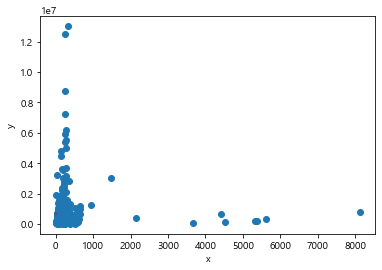

In [237]:
plt.scatter(X_train, Y_train)
plt.plot([0, 10], [w[0], 10*w[1]+w[0]], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [238]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)

-0.013181241032878654

In [239]:
Y_pred = lr.predict(X_test)
r2 = 1 - ((Y_test - Y_pred)**2).sum() / ((Y_test - Y_test.mean())**2).sum()
print(r2)

view_num   -0.013181
dtype: float64


In [240]:
print(lr.coef_, lr.intercept_)

[[-7.11004707]] [679726.51811012]


C:\Users\stone\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


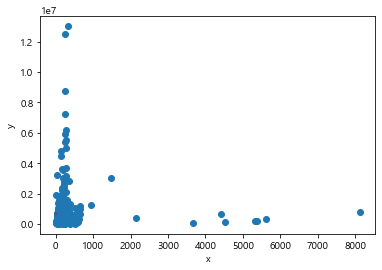

In [241]:
plt.scatter(X_train, Y_train)
plt.plot([0, 10], [lr.intercept_, 10 * lr.coef_ + lr.intercept_], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [242]:
lr_no_intercept = LinearRegression(fit_intercept=False)
lr_no_intercept.fit(X_train, Y_train)
print(lr_no_intercept.coef_, lr_no_intercept.intercept_)

[[323.43031019]] 0.0


C:\Users\stone\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


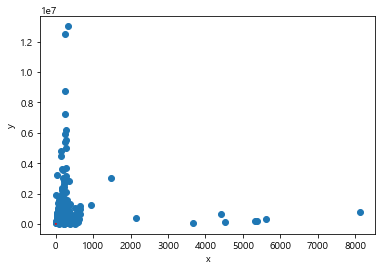

In [243]:
plt.scatter(X_train, Y_train)
plt.plot([0, 10], 
         [lr_no_intercept.intercept_, 10 * lr_no_intercept.coef_ + 
          lr_no_intercept.intercept_], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()